In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=dca13a603f9f76ab6942b5025b7aa37af16cbef7cfaf599f0f8175e274b52f56
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget
import os
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf

from keras import layers
from keras.models import Sequential
import pathlib

In [ ]:
dataset_url = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
image_directory = pathlib.Path(tf.keras.utils.get_file('Images', origin=dataset_url, untar=True))

793591808/793579520 [==============================] - 64s 0us/step


In [ ]:
image_dim = 300

In [ ]:
img_size = 300

In [ ]:
training_df = tf.keras.utils.image_dataset_from_directory(
  image_directory,
  validation_split=0.15,
  subset = "training",
  seed = 69,
  image_size = (image_dim, image_dim),
  batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 17493 files for training.


In [ ]:
validation_df = tf.keras.utils.image_dataset_from_directory(
  image_directory,
  validation_split = 0.15,
  subset = "validation",
  seed = 69,
  image_size = (image_dim, image_dim),
  batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 3087 files for validation.


In [ ]:
for i in range(len(training_df.class_names)): 
  training_df.class_names[i] = training_df.class_names[i][10:]

In [ ]:
breeds = training_df.class_names
print(breeds)

['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih-Tzu', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback', 'Afghan_hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black-and-tan_coonhound', 'Walker_hound', 'English_foxhound', 'redbone', 'borzoi', 'Irish_wolfhound', 'Italian_greyhound', 'whippet', 'Ibizan_hound', 'Norwegian_elkhound', 'otterhound', 'Saluki', 'Scottish_deerhound', 'Weimaraner', 'Staffordshire_bullterrier', 'American_Staffordshire_terrier', 'Bedlington_terrier', 'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier', 'Norfolk_terrier', 'Norwich_terrier', 'Yorkshire_terrier', 'wire-haired_fox_terrier', 'Lakeland_terrier', 'Sealyham_terrier', 'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont', 'Boston_bull', 'miniature_schnauzer', 'giant_schnauzer', 'standard_schnauzer', 'Scotch_terrier', 'Tibetan_terrier', 'silky_terrier', 'soft-coated_wheaten_terrier', 'West_Highland_white_terrier', 'Lhasa', 'flat-coated_retriever', 'cur

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_df.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_df.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalise = layers.Rescaling(1./255)
normalised_df = train_ds.map(lambda x, y: (normalise(x), y))

image_batch, labels_batch = next(iter(normalised_df))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(breeds)

In [ ]:
aug_imgs = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(image_dim,
                                  image_dim,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  aug_imgs,
  layers.Rescaling(1./255, input_shape=(image_dim, image_dim, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 dropout (Dropout)           (None, 150, 150, 32)      0         
                                                      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
iterations = 300

In [ ]:
aug_learning = model.fit(
  training_df,
  validation_data = validation_df,
  epochs=iterations
)

Epoch 1/300
547/547 [==============================] - 34s 61ms/step - loss: 4.2763 - accuracy: 0.0512 - val_loss: 4.2620 - val_accuracy: 0.0564
Epoch 2/300
547/547 [==============================] - 33s 60ms/step - loss: 4.1320 - accuracy: 0.0684 - val_loss: 4.1445 - val_accuracy: 0.0719
Epoch 3/300
547/547 [==============================] - 33s 60ms/step - loss: 4.0214 - accuracy: 0.0861 - val_loss: 4.1072 - val_accuracy: 0.0758
Epoch 4/300
547/547 [==============================] - 33s 60ms/step - loss: 3.9415 - accuracy: 0.0988 - val_loss: 4.0466 - val_accuracy: 0.0794
Epoch 5/300
547/547 [==============================] - 33s 60ms/step - loss: 3.8624 - accuracy: 0.1142 - val_loss: 3.9942 - val_accuracy: 0.0858
Epoch 6/300
547/547 [==============================] - 33s 60ms/step - loss: 3.7965 - accuracy: 0.1179 - val_loss: 3.9131 - val_accuracy: 0.1088
Epoch 7/300
547/547 [==============================] - 33s 60ms/step - loss: 3.7387 - accuracy: 0.1329 - val_loss: 3.9378 - val_ac

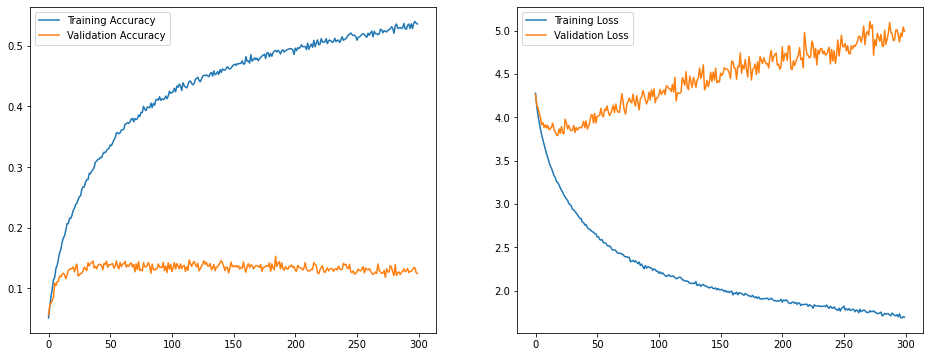

In [ ]:
acc = aug_learning.history['accuracy']
val_acc = aug_learning.history['val_accuracy']

loss = aug_learning.history['loss']
val_loss = aug_learning.history['val_loss']

epochs_range = range(iterations)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
print(breeds)

['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih-Tzu', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback', 'Afghan_hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black-and-tan_coonhound', 'Walker_hound', 'English_foxhound', 'redbone', 'borzoi', 'Irish_wolfhound', 'Italian_greyhound', 'whippet', 'Ibizan_hound', 'Norwegian_elkhound', 'otterhound', 'Saluki', 'Scottish_deerhound', 'Weimaraner', 'Staffordshire_bullterrier', 'American_Staffordshire_terrier', 'Bedlington_terrier', 'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier', 'Norfolk_terrier', 'Norwich_terrier', 'Yorkshire_terrier', 'wire-haired_fox_terrier', 'Lakeland_terrier', 'Sealyham_terrier', 'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont', 'Boston_bull', 'miniature_schnauzer', 'giant_schnauzer', 'standard_schnauzer', 'Scotch_terrier', 'Tibetan_terrier', 'silky_terrier', 'soft-coated_wheaten_terrier', 'West_Highland_white_terrier', 'Lhasa', 'flat-coated_retriever', 'cur

In [ ]:
def predict_dog_breed(img):
  img = img.resize((image_dim, image_dim))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  prediction = breeds[np.argmax(score)]
  confidence = 100 * np.max(score)

  return prediction, confidence

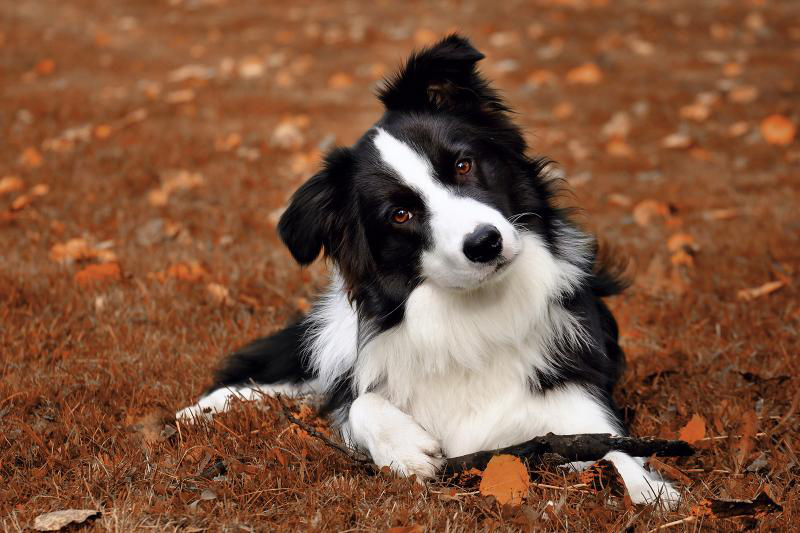

Prediction Breed:  Saint_Bernard
Confidence:  23.585742712020874 %


In [ ]:
img = Image.open(r"border_collie.jpg")
display(img)
prediction, confidence = predict_dog_breed(img)

print("Prediction Breed: ", prediction)
print("Confidence: ", confidence, "%")

# GRACE CODE IS BELOW

In [ ]:
from tensorflow.keras import applications

InceptionV3 = applications.InceptionV3(include_top=False, input_shape=(
    300, 300, 3), weights='imagenet')

In [ ]:
import keras.layers as l
from tensorflow.keras.models import Sequential, load_model
import numpy as np

model2 = Sequential(aug_imgs)

for layer in InceptionV3.layers:
    layer.trainable = False

model2.add(InceptionV3)
model2.add(l.GlobalAveragePooling2D())
model2.add(l.Dropout(0.2))
model2.add(l.Dense(120))

model2.summary()

In [ ]:
model2 = Sequential([
  aug_imgs,
  layers.Rescaling(1./255, input_shape=(image_dim, image_dim, 3)),
  InceptionV3,
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint(
    'Inception-base.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    period=1
)

es = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode='auto'
)

rlr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [mc, es, rlr]

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model2.compile(
        optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
    )


In [ ]:
epochs = 20

In [ ]:
print(len(training_df)*32)

In [ ]:
model2 = load_model("dogmodel.h5")

In [ ]:
unfreeze_model(model2)

hist = model2.fit(
    training_df,
    validation_data=validation_df,
    epochs=epochs,
    #batch_size=16,
    callbacks=callbacks
)